# Bicycle and Pedestrian Crashes by Month

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib._color_data import TABLEAU_COLORS
import matplotlib.ticker as mtick

import os
os.chdir('..')

from scripts.crash_data_analysis import CrashDataAnalysis
cda = CrashDataAnalysis()

In [2]:
# Aggregate fatality crashes by year and day of year

query = """
select
to_char(reported_date, 'YYYY-MM') as crash_year_month
, count(*) as num_crashes
, sum(case when pedestrian_ind > 0 then 1 else 0 end) as pedestrian_involved_crash
, sum(case when bicycle_ind > 0 then 1 else 0 end) as bicycle_involved_crash
, sum(case when pedestrian_ind > 0 and fatality then 1 else 0 end) as pedestrian_involved_fatal_crash
, sum(case when bicycle_ind > 0 and fatality then 1 else 0 end) as bicycle_involved_fatal_crash
, sum(fatality::int) as fatal_crash

from crashes

group by 1 order by 1
"""

crashes_by_month = pd.read_sql(query, cda.conn)

In [3]:
crashes_by_month['pedestrian_involved_crash_perc'] = (
    crashes_by_month['pedestrian_involved_crash'] / crashes_by_month['num_crashes']
)

crashes_by_month['bicycle_involved_crash_perc'] = (
    crashes_by_month['bicycle_involved_crash'] / crashes_by_month['num_crashes']
)

crashes_by_month['pedestrian_involved_fatal_crash_over_fatal_crashes'] = (
    crashes_by_month['pedestrian_involved_fatal_crash'] / crashes_by_month['fatal_crash']
)

crashes_by_month['pedestrian_involved_fatal_crash_over_all_crashes'] = (
    crashes_by_month['pedestrian_involved_fatal_crash'] / crashes_by_month['num_crashes']
)

crashes_by_month.tail(24)

,crash_year_month,num_crashes,pedestrian_involved_crash,bicycle_involved_crash,pedestrian_involved_fatal_crash,bicycle_involved_fatal_crash,fatal_crash,pedestrian_involved_crash_perc,bicycle_involved_crash_perc,pedestrian_involved_fatal_crash_over_fatal_crashes,pedestrian_involved_fatal_crash_over_all_crashes
125,2023-06,1543,37,21,3,0,11,0.023979,0.013610,0.272727,0.001944
126,2023-07,1528,32,22,1,1,7,0.020942,0.014398,0.142857,0.000654
127,2023-08,1647,52,25,4,1,6,0.031573,0.015179,0.666667,0.002429
128,2023-09,1573,54,26,4,0,10,0.034329,0.016529,0.400000,0.002543
129,2023-10,1660,49,21,1,0,5,0.029518,0.012651,0.200000,0.000602
130,2023-11,1535,48,6,3,0,5,0.031270,0.003909,0.600000,0.001954
131,2023-12,1429,41,10,3,0,7,0.028691,0.006998,0.428571,0.002099
132,2024-01,1471,33,5,2,0,6,0.022434,0.003399,0.333333,0.001360
133,2024-02,1368,22,13,0,0,2,0.016082,0.009503,0.000000,0.000000
134,2024-03,1430,37,15,1,0,6,0.025874,0.010490,0.166667,0.000699


## Crashes by year

In [4]:
query = """
select
to_char(reported_date, 'YYYY') as crash_year
, count(*) as num_crashes
, sum(case when pedestrian_ind > 0 then 1 else 0 end) as pedestrian_involved_crash
, sum(case when bicycle_ind > 0 then 1 else 0 end) as bicycle_involved_crash
, sum(case when pedestrian_ind > 0 and fatality then 1 else 0 end) as pedestrian_involved_fatal_crash
, sum(case when bicycle_ind > 0 and fatality then 1 else 0 end) as bicycle_involved_fatal_crash
, sum(fatality::int) as fatal_crash

from crashes

-- where to_char(reported_date, 'YYYY') < '2023'

group by 1 order by 1
"""

crashes_by_year = pd.read_sql(query, cda.conn)

crashes_by_year['pedestrian_involved_crash_perc'] = (
    crashes_by_year['pedestrian_involved_crash'] / crashes_by_year['num_crashes']
)

crashes_by_year['bicycle_involved_crash_perc'] = (
    crashes_by_year['bicycle_involved_crash'] / crashes_by_year['num_crashes']
)

crashes_by_year['pedestrian_involved_fatal_crash_over_fatal_crashes'] = (
    crashes_by_year['pedestrian_involved_fatal_crash'] / crashes_by_year['fatal_crash']
)

crashes_by_year['pedestrian_involved_fatal_crash_over_all_crashes'] = (
    crashes_by_year['pedestrian_involved_fatal_crash'] / crashes_by_year['num_crashes']
)

crashes_by_year['perc_of_pedestrian_involved_crash_that_are_fatal'] = (
    crashes_by_year['pedestrian_involved_fatal_crash'] / crashes_by_year['pedestrian_involved_crash']
)

# todo: calculate crashes per day so the current year can be plotted alongside complete years
# crashes_by_year['pedestrian_involved_crash_per_day'] =

crashes_by_year

,crash_year,num_crashes,pedestrian_involved_crash,bicycle_involved_crash,pedestrian_involved_fatal_crash,bicycle_involved_fatal_crash,fatal_crash,pedestrian_involved_crash_perc,bicycle_involved_crash_perc,pedestrian_involved_fatal_crash_over_fatal_crashes,pedestrian_involved_fatal_crash_over_all_crashes,perc_of_pedestrian_involved_crash_that_are_fatal
0,2013,21594,523,320,15,0,42,0.024220,0.014819,0.357143,0.000695,0.028681
1,2014,23097,500,331,16,4,48,0.021648,0.014331,0.333333,0.000693,0.032000
2,2015,24810,528,345,13,2,54,0.021282,0.013906,0.240741,0.000524,0.024621
3,2016,25441,511,313,19,4,56,0.020086,0.012303,0.339286,0.000747,0.037182
4,2017,25901,515,323,13,1,50,0.019883,0.012471,0.260000,0.000502,0.025243
5,2018,25574,521,315,22,6,62,0.020372,0.012317,0.354839,0.000860,0.042226
6,2019,24881,502,280,19,3,63,0.020176,0.011254,0.301587,0.000764,0.037849
7,2020,15925,311,195,17,0,53,0.019529,0.012245,0.320755,0.001068,0.054662
8,2021,18465,429,161,25,1,77,0.023233,0.008719,0.324675,0.001354,0.058275
9,2022,18089,373,171,25,4,81,0.020620,0.009453,0.308642,0.001382,0.067024


## Bicycle crashes by month

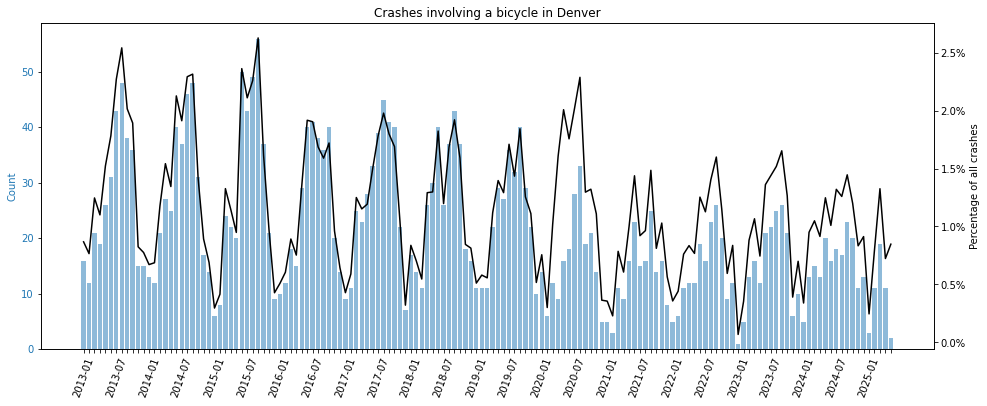

In [5]:
fig, ax1 = plt.subplots(figsize=(16,6))

data_to_plot = crashes_by_month.copy()

ax1_color = TABLEAU_COLORS['tab:blue']
ax1.bar(
    x=data_to_plot['crash_year_month']
    , height=data_to_plot['bicycle_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year_month']
    , data_to_plot['bicycle_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))

ax1.tick_params(axis='x', rotation=70)

n = 6  # Keep every Nth label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

plt.title('Crashes involving a bicycle in Denver')
plt.savefig('images/crashes_by_month_bicycle.png', facecolor='white', bbox_inches='tight')

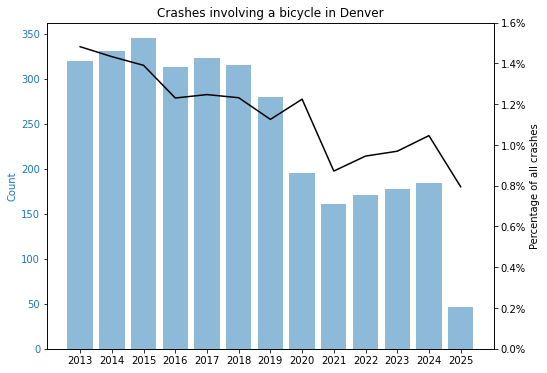

In [6]:
fig, ax1 = plt.subplots(figsize=(8,6))

data_to_plot = crashes_by_year.copy()

ax1_color = TABLEAU_COLORS['tab:blue']
ax1.bar(
    x=data_to_plot['crash_year']
    , height=data_to_plot['bicycle_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year']
    , data_to_plot['bicycle_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))
ax2.set_ylim(bottom=0, top=0.016)

ax1.tick_params(axis='x', rotation=0)


plt.title('Crashes involving a bicycle in Denver')
plt.savefig('images/crashes_by_year_bicycle.png', facecolor='white', bbox_inches='tight')

## Pedestrian crashes by month

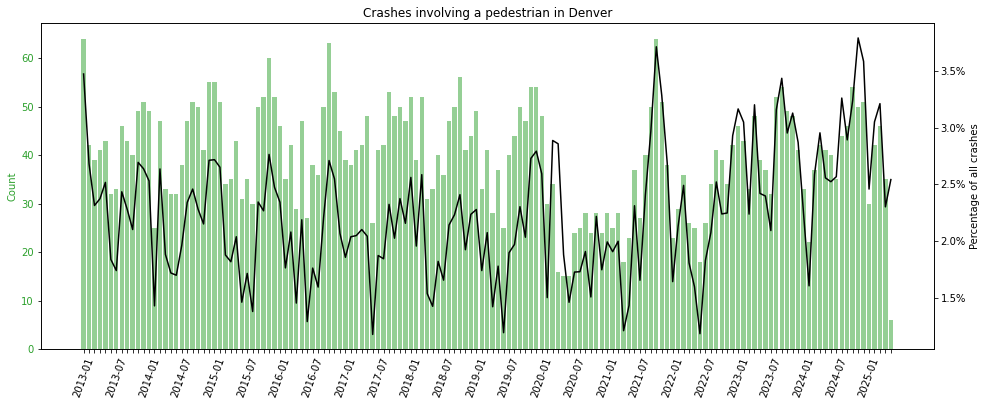

In [7]:
fig, ax1 = plt.subplots(figsize=(16,6))

data_to_plot = crashes_by_month.copy()

ax1_color = TABLEAU_COLORS['tab:green']
ax1.bar(
    x=data_to_plot['crash_year_month']
    , height=data_to_plot['pedestrian_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year_month']
    , data_to_plot['pedestrian_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))

ax1.tick_params(axis='x', rotation=70)

n = 6  # Keep every Nth label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

plt.title('Crashes involving a pedestrian in Denver')
plt.savefig('images/crashes_by_month_pedestrian.png', facecolor='white', bbox_inches='tight')

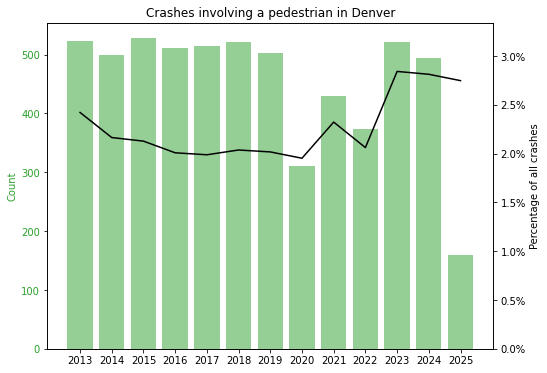

In [8]:
fig, ax1 = plt.subplots(figsize=(8,6))

data_to_plot = crashes_by_year.copy()

ax1_color = TABLEAU_COLORS['tab:green']
ax1.bar(
    x=data_to_plot['crash_year']
    , height=data_to_plot['pedestrian_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year']
    , data_to_plot['pedestrian_involved_crash_perc']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))
ax2.set_ylim(bottom=0, top=data_to_plot.pedestrian_involved_crash_perc.max() + 0.005)

ax1.tick_params(axis='x', rotation=0)

plt.title('Crashes involving a pedestrian in Denver')
plt.savefig('images/crashes_by_year_pedestrian.png', facecolor='white', bbox_inches='tight')

## Pedestrian fatal crashes as a percentage of all crashes

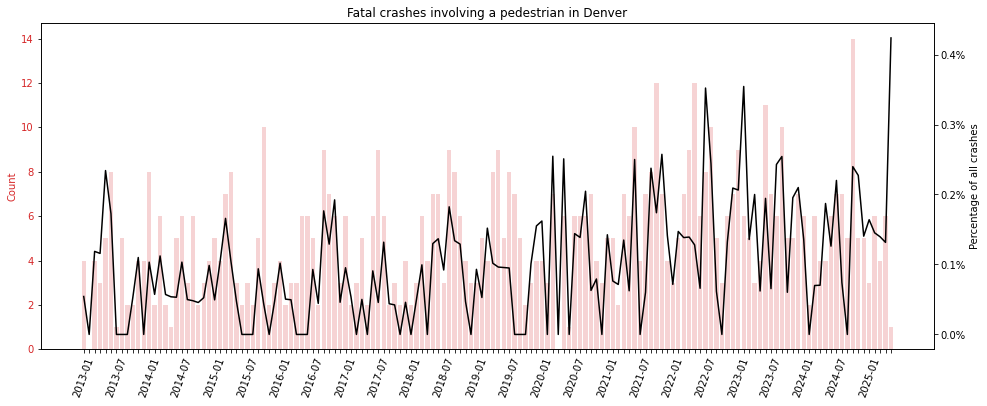

In [9]:
fig, ax1 = plt.subplots(figsize=(16,6))

data_to_plot = crashes_by_month.copy()

ax1_color = TABLEAU_COLORS['tab:red']
ax1.bar(
    x=data_to_plot['crash_year_month']
    , height=data_to_plot['fatal_crash']
    , color=ax1_color
    , alpha=0.2
)
ax1.set_ylabel('Count', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year_month']
    , data_to_plot['pedestrian_involved_fatal_crash_over_all_crashes']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1))

ax1.tick_params(axis='x', rotation=70)

n = 6  # Keep every Nth label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]

plt.title('Fatal crashes involving a pedestrian in Denver')
plt.savefig('images/fatal_crashes_by_month_pedestrian.png', facecolor='white', bbox_inches='tight')

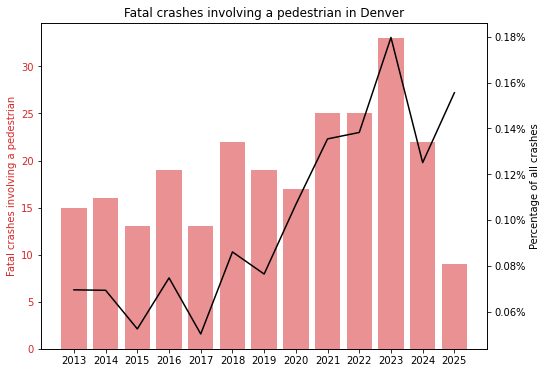

In [10]:
fig, ax1 = plt.subplots(figsize=(8,6))

data_to_plot = crashes_by_year.copy()

ax1_color = TABLEAU_COLORS['tab:red']
ax1.bar(
    x=data_to_plot['crash_year']
    , height=data_to_plot['pedestrian_involved_fatal_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Fatal crashes involving a pedestrian', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year']
    , data_to_plot['pedestrian_involved_fatal_crash_over_all_crashes']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of all crashes', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))
# ax2.set_ylim(bottom=0, top=0.03)

ax1.tick_params(axis='x', rotation=0)

plt_title = 'Fatal crashes involving a pedestrian in Denver'
plt.title(plt_title)
plt.savefig(f"images/{plt_title.replace(' ', '_').lower()}.png", facecolor='white', bbox_inches='tight')

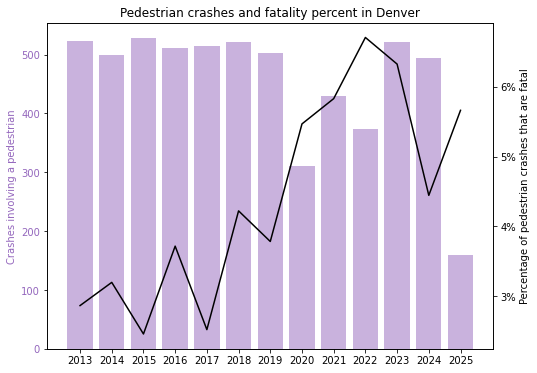

In [11]:
fig, ax1 = plt.subplots(figsize=(8,6))

data_to_plot = crashes_by_year.copy()

ax1_color = TABLEAU_COLORS['tab:purple']
ax1.bar(
    x=data_to_plot['crash_year']
    , height=data_to_plot['pedestrian_involved_crash']
    , color=ax1_color
    , alpha=0.5
)
ax1.set_ylabel('Crashes involving a pedestrian', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()

ax2_color = 'black'
ax2.plot(
    data_to_plot['crash_year']
    , data_to_plot['perc_of_pedestrian_involved_crash_that_are_fatal']
    , color=ax2_color
)
ax2.set_ylabel('Percentage of pedestrian crashes that are fatal', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
# ax2.set_ylim(bottom=0, top=0.03)

ax1.tick_params(axis='x', rotation=0)

plt_title = 'Pedestrian crashes and fatality percent in Denver'
plt.title(plt_title)
plt.savefig(f"images/{plt_title.replace(' ', '_').lower()}.png", facecolor='white', bbox_inches='tight')